# Handling constraints in minimize
Consider the simple function

$$f(x, y) = x^2 + y^2$$

It is clear that this function is convex and has a single minimum at $(x, y) = (0, 0)$. 

In [116]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
def f(x, y):
    return x**2 + y**2

In [118]:
xx, yy = numpy.mgrid[-2:2:100j, -2:2:100j]

In [122]:
def plotfunc():
    plt.pcolor(xx, yy, f(xx, yy))

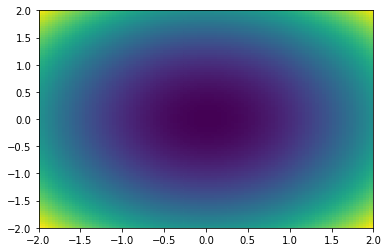

In [123]:
plotfunc()

We'll define a wrapper function to expand the parameters from `minimize`

In [129]:
def f2(p):
    return(f(*p))

`minimize` has no problem finding the minimum

In [130]:
r = scipy.optimize.minimize(f2, (10, 10))
r

      fun: 9.714371410949269e-13
 hess_inv: array([[ 0.75000002, -0.24999998],
       [-0.24999998,  0.75000002]])
      jac: array([ -1.37896909e-06,  -1.37896909e-06])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([ -6.96935126e-07,  -6.96935126e-07])

In [131]:
def plotsolution(r):
    x, y = r.x
    plt.scatter(x, y, color='red')

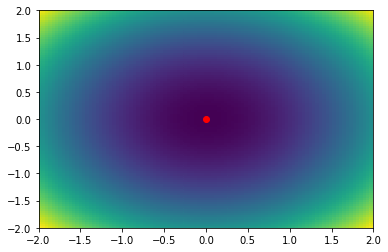

In [132]:
plotfunc()
plotsolution(r)

Let's impose box constraints. We'll limit $1 \leq x \leq 2$ and $0.5 \leq y \leq 1.5$

In [133]:
def plotbox():
    plt.pcolor(xx, yy, f(xx, yy))
    plt.plot([1, 2, 2, 1, 1], [0.5, 0.5, 1.5, 1.5, 0.5], color='red')

In [134]:
r = scipy.optimize.minimize(f2, (10, 10), bounds=[(1, 2), (0.5, 1.5)])
r

      fun: 1.25
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.99999999,  1.00000002])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 1
   status: 0
  success: True
        x: array([ 1. ,  0.5])

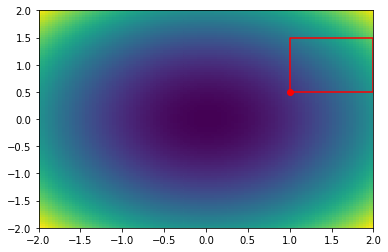

In [135]:
plotbox()
plotsolution(r)

That answer seems about right. What about more interesting constraints? Let's try a quadratic constraint.

In [136]:
def ineq(x, y):
    return -((x-2)**2 + (y-1)**2 - 2)

In [137]:
def ineq2(p):
    return ineq(*p)

We can visualise the region with a contour

In [138]:
def plotineq():
    plt.pcolor(xx, yy, f(xx, yy))
    plt.contour(xx, yy, ineq(xx, yy), [0], colors='r')

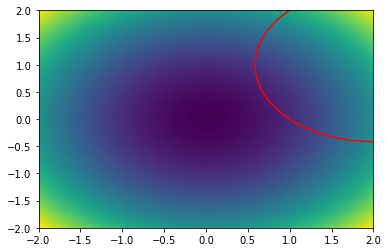

In [139]:
plotineq()

Now we optimize and pass the inequality constraint:

In [140]:
r = scipy.optimize.minimize(f2, (2, 2), constraints={'type': 'ineq',
                                                     'fun': ineq2})

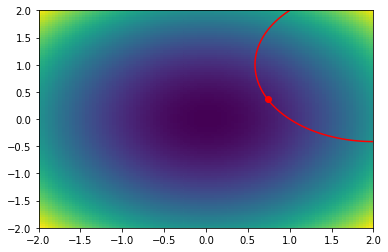

In [141]:
plotineq()
plt.scatter(r.x[0], r.x[1], color='r')

That seems OK